In [1]:
import pandas as pd
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt  
import matplotlib as mpl
import seaborn as sns  
import random

In [2]:
wine = pd.read_csv("winemag dataset.csv")
wine.head()

,points,title,description,taster_name,price,variety,province,country,winery
0,89,Argiolas 2017 Perdera (Monica di Sardegna),"Fragrant blue flower, Mediterranean herb and w...",Kerin O’Keefe,19.0,Red Blends,Sicily & Sardinia,Italy,Argiolas
1,89,Argiolas 2018 Costamolino (Vermentino di Sard...,Spring blossom and yellow stone fruit aromas m...,Kerin O’Keefe,19.0,Vermentino,Sicily & Sardinia,Italy,Argiolas
2,89,"Bushong 2017 Power, Corruption & Lies Red (Pas...","Deep, dark and intense aromas of blackberry me...",Matt Kettmann,43.0,Rhône-style Red Blend,California,US,Bushong
3,89,Buttonwood Grove 2017 Riesling (Finger Lakes),Honey-drizzled pear and peach meld with a bit ...,Alexander Peartree,16.0,Riesling,New York,US,Buttonwood Grove
4,89,Casa Silva 2018 Los Lingues Vineyard Estate Gr...,Leathery plum and berry aromas show some oak i...,Michael Schachner,20.0,Cabernet Sauvignon,Colchagua Valley,Chile,Casa Silva


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147309 entries, 0 to 147308
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   points       147309 non-null  int64  
 1   title        147309 non-null  object 
 2   description  147309 non-null  object 
 3   taster_name  121065 non-null  object 
 4   price        137473 non-null  float64
 5   variety      147308 non-null  object 
 6   province     147244 non-null  object 
 7   country      147244 non-null  object 
 8   winery       147309 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.1+ MB


In [4]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
points,147309.0,88.646118,3.082932,80.0,87.0,88.0,91.0,100.0
price,137473.0,36.327999,43.021778,4.0,17.0,26.0,44.0,3300.0


In [5]:
wine.describe(include = [object]).T

,count,unique,top,freq
title,147309,136061,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11
description,147309,137289,"Cigar box, café au lait, and dried tobacco aro...",3
taster_name,121065,19,Roger Voss,28879
variety,147308,780,Pinot Noir,15461
province,147244,454,California,41219
country,147244,43,US,61575
winery,147309,18556,Wines & Winemakers,255


In [6]:
wine.drop_duplicates(subset=None, keep='first', inplace=True)    # drop duplicate rows
wine

,points,title,description,taster_name,price,variety,province,country,winery
0,89,Argiolas 2017 Perdera (Monica di Sardegna),"Fragrant blue flower, Mediterranean herb and w...",Kerin O’Keefe,19.0,Red Blends,Sicily & Sardinia,Italy,Argiolas
1,89,Argiolas 2018 Costamolino (Vermentino di Sard...,Spring blossom and yellow stone fruit aromas m...,Kerin O’Keefe,19.0,Vermentino,Sicily & Sardinia,Italy,Argiolas
2,89,"Bushong 2017 Power, Corruption & Lies Red (Pas...","Deep, dark and intense aromas of blackberry me...",Matt Kettmann,43.0,Rhône-style Red Blend,California,US,Bushong
3,89,Buttonwood Grove 2017 Riesling (Finger Lakes),Honey-drizzled pear and peach meld with a bit ...,Alexander Peartree,16.0,Riesling,New York,US,Buttonwood Grove
4,89,Casa Silva 2018 Los Lingues Vineyard Estate Gr...,Leathery plum and berry aromas show some oak i...,Michael Schachner,20.0,Cabernet Sauvignon,Colchagua Valley,Chile,Casa Silva
...,...,...,...,...,...,...,...,...,...
147304,90,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Anna Lee C. Iijima,28.0,Riesling,Mosel,Germany,Dr. H. Thanisch (Erben Müller-Burggraef)
147305,90,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,Paul Gregutt,75.0,Pinot Noir,Oregon,US,Citation
147306,90,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Roger Voss,30.0,Gewürztraminer,Alsace,France,Domaine Gresser
147307,90,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",Roger Voss,32.0,Pinot Gris,Alsace,France,Domaine Marcel Deiss


<AxesSubplot:>

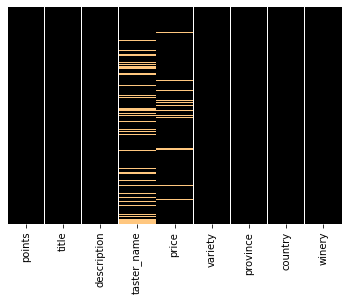

In [7]:
sns.heatmap(wine.isnull(), yticklabels=False, cbar=False, cmap='copper')  # wiew the distribution of NAN

In [8]:
wine.info()   # taster_name/ price/ variety/ province/ country/ have NAN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137326 entries, 0 to 147308
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   points       137326 non-null  int64  
 1   title        137326 non-null  object 
 2   description  137326 non-null  object 
 3   taster_name  112409 non-null  object 
 4   price        128091 non-null  float64
 5   variety      137325 non-null  object 
 6   province     137265 non-null  object 
 7   country      137265 non-null  object 
 8   winery       137326 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.5+ MB


In [10]:
wine = wine.dropna(axis=0, how='any', subset=['variety'])    # drop NAN in variety
wine.price.fillna(wine.price.dropna().median(), inplace =True)   # price.median to fill NAN in price

# Data Visualization
- 1. Analysis of Points / Price
- 2. Analysis of Country with Points / Price
- 3. Analysis of Winery with Points / Pric
- 4. Analysis of Variety with Points / Price
- 5. Analysis of Taster
- 6. Analysis of Description

## 1. Analysis of Points / Price

<AxesSubplot:xlabel='points'>

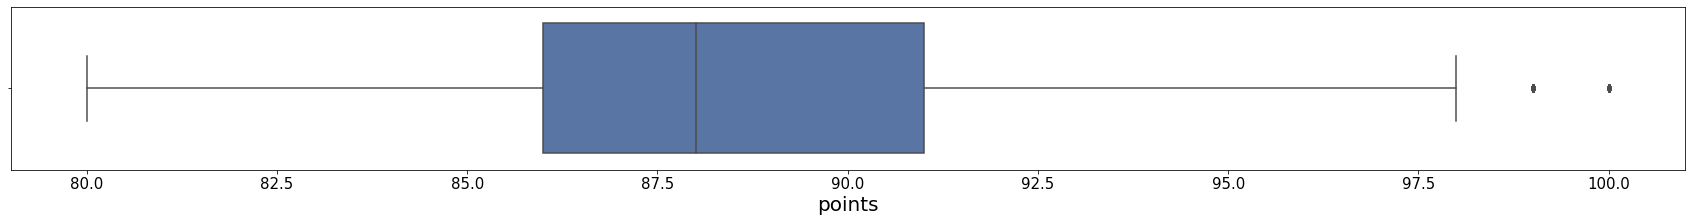

In [11]:
# outliers in points
plt.figure(figsize=(30,3))
plt.xticks(fontsize=15) 
plt.xlabel('points', fontsize = 20) 
sns.boxplot(x=wine['points'], palette='deep') 

<AxesSubplot:title={'center':'Number of wines per points'}, xlabel='points', ylabel='count'>

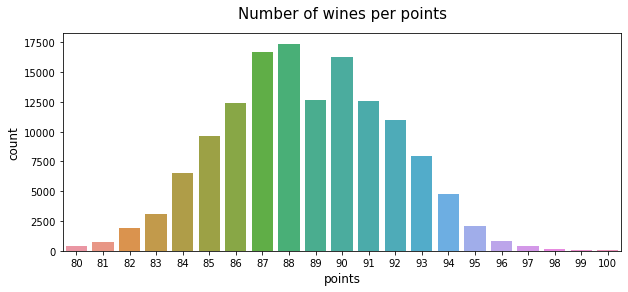

In [12]:
plt.figure(figsize=(10,4))     
plt.title('Number of wines per points', size=15, pad=15)   
plt.xlabel('points', fontsize=12) 
plt.ylabel('count', fontsize=12) 
sns.set_color_codes("pastel")
sns.countplot(x="points", data=wine)

<AxesSubplot:xlabel='price'>

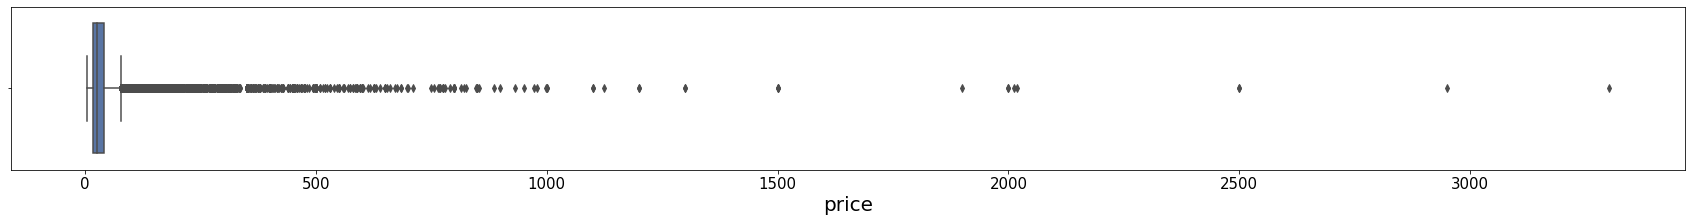

In [13]:
# outliers in price
plt.figure(figsize=(30,3))
plt.xticks(fontsize=15) 
plt.xlabel('price', fontsize = 20) 
sns.boxplot(x=wine['price'], palette='deep')

In [14]:
wine['price'].describe()    # mainly < 40, but max is 3300

count    137325.000000
mean         35.908626
std          42.632554
min           4.000000
25%          18.000000
50%          26.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [15]:
price = wine[["price"]]    # Grouping price
price1 = price[(price['price']<=10)]
price2 = price[(price['price']<=20) & (price['price']>10)]
price3 = price[(price['price']<=30) & (price['price']>20)]
price4 = price[(price['price']<=40) & (price['price']>30)]
price5 = price[(price['price']<=50) & (price['price']>40)]
price6 = price[(price['price']<=60) & (price['price']>50)]
price7 = price[(price['price']<=70) & (price['price']>60)]
price8 = price[(price['price']<=80) & (price['price']>70)]
price9 = price[(price['price']<=90) & (price['price']>80)]
price10 = price[(price['price']<=100) & (price['price']>90)]
price11 = price[(price['price']>100)]

price_new = {"price": ['<10']*len(price1) + ['10~20']*len(price2) + ['20~30']*len(price3) + ['30~40']*len(price4) + 
             ['40~50']*len(price5) + ['50~60']*len(price6) + ['60~70']*len(price7) + ['70~80']*len(price8) + 
             ['80~90']*len(price9) + ['90~100']*len(price10) + ['>100']*len(price11)}
price_new = pd.DataFrame(price_new)

<AxesSubplot:title={'center':'Number of wines price'}, xlabel='price', ylabel='count'>

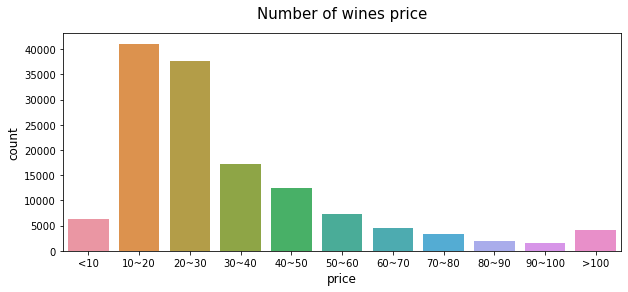

In [16]:
plt.figure(figsize=(10,4))     
plt.title('Number of wines price', size=15, pad=15)   
plt.xlabel('price', fontsize=12) 
plt.ylabel('count', fontsize=12) 
sns.set_color_codes("pastel")
sns.countplot(x="price", data=price_new)

In [72]:
wine.corr()['points'].sort_values() 

price     0.3976
points    1.0000
Name: points, dtype: float64

In [73]:
wine.corr()['price'].sort_values() 

points    0.3976
price     1.0000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='points'>

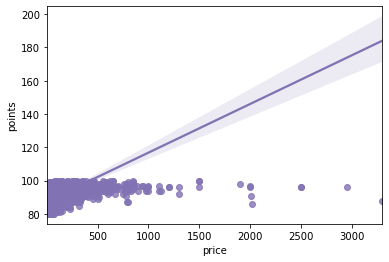

In [17]:
sns.set_color_codes("deep")      # relationship between points and price
sns.regplot(x='price', y='points', data=wine, color='m')

In [27]:
from sklearn.linear_model import LinearRegression    # Standard ML Models for comparison
from sklearn.model_selection import train_test_split    # Splitting data into training/testing
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error    # Metrics
import scipy    # Distributions

In [28]:
df_X = wine[['price']]
df_y = wine[['points']]

In [29]:
# Split into training/ testing sets, 75% is training and 25% is testing data.
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.25, random_state=123)

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
predictions = lr.predict(X_test)
print('Using Linear Regression, MAE is %0.2f' %  np.mean(abs(predictions - y_test)))  
print('Using Linear Regression, RMSE is %0.2f' %  np.sqrt(np.mean((predictions - y_test) ** 2)))    
print()
np.set_printoptions(suppress=2)
print('Points =', '%0.2f' % lr.intercept_[0], '+', '%0.2f' % lr.coef_[0][0], '* Price')

Using Linear Regression, MAE is 2.28
Using Linear Regression, RMSE is 2.85

Points = 87.63 + 0.03 * Price


## 2. Analysis of Country with Points / Price

In [66]:
wine['country'].value_counts()[:15]     # country top 15

US              57528
France          24731
Italy           20169
Spain            6608
Portugal         6175
Chile            4411
Argentina        3793
Austria          3656
Australia        2555
Germany          2231
New Zealand      1457
South Africa     1392
Greece            492
Israel            489
Canada            259
Name: country, dtype: int64

<AxesSubplot:title={'center':'Country of wine origin'}, xlabel='country', ylabel='count'>

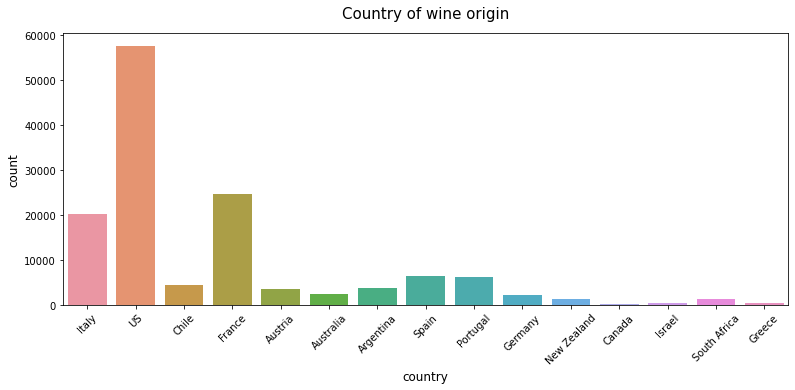

In [68]:
plt.figure(figsize=(13,5))
plt.title('Country of wine origin', size=15, pad=15)   
plt.xlabel('country', fontsize=12) 
plt.ylabel('count', fontsize=12) 
plt.xticks(rotation=45) 
country = wine['country'].value_counts()[:15]
sns.countplot(x="country", data=wine[wine['country'].isin(country.index.values)])   

<AxesSubplot:title={'center':'Comparison of points in different countries'}, xlabel='country', ylabel='points'>

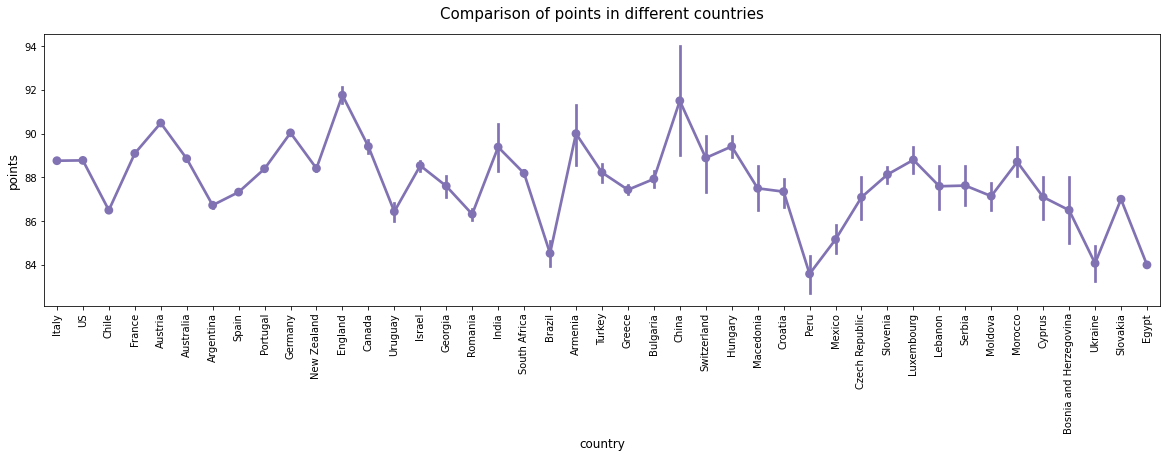

In [69]:
# country -- points 

plt.figure(figsize=(20,5))
plt.title('Comparison of points in different countries', size=15, pad=15)   
plt.xlabel('country', fontsize=12) 
plt.ylabel('points', fontsize=12) 
plt.xticks(rotation=90) 
sns.set_color_codes("deep")
sns.pointplot(x='country', y='points', data=wine, color='m')

<AxesSubplot:title={'center':'Average of points in different countries'}, xlabel='points', ylabel='country'>

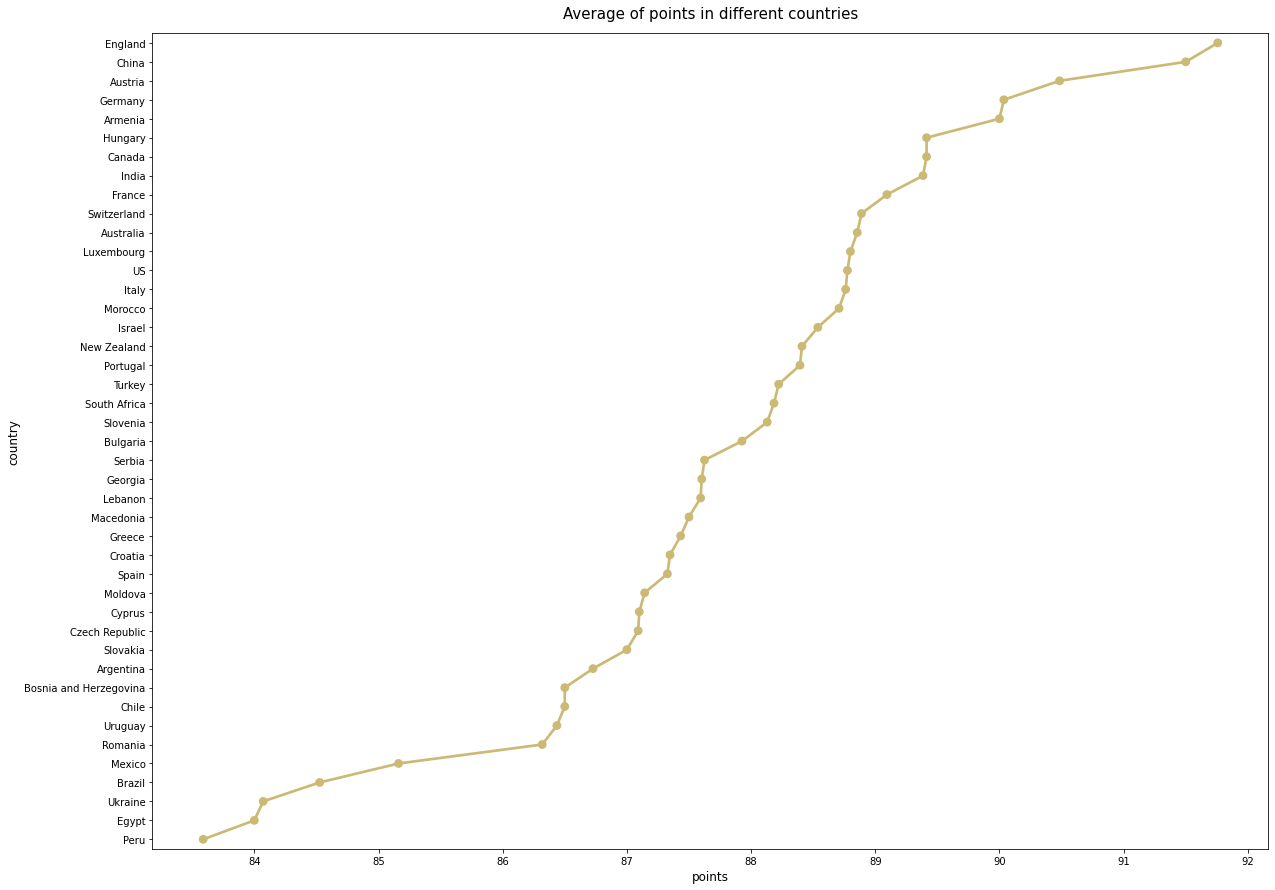

In [70]:
country_mean = wine.groupby(['country']).mean()['points'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(20,15))
plt.title('Average of points in different countries', size=15, pad=15)   
plt.xlabel('average of points', fontsize=12) 
plt.ylabel('country', fontsize=12) 
sns.pointplot(x='points', y=country_mean.index, data=country_mean, color='y', markers='o')

<AxesSubplot:title={'center':'Comparison of price in different countries (log scale)'}, xlabel='country', ylabel='price'>

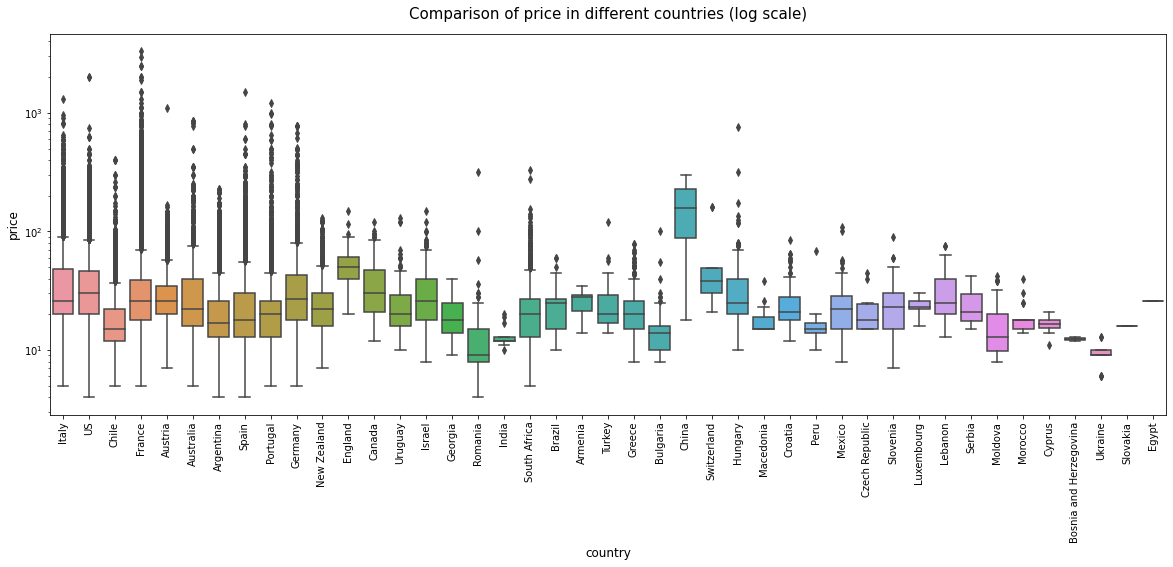

In [71]:
# country -- price 

plt.figure(figsize=(20,7))
plt.yscale("log")
plt.title('Comparison of price in different countries (log scale)', size=15, pad=15)   
plt.xlabel('country', fontsize=12) 
plt.ylabel('points', fontsize=12) 
plt.xticks(rotation=90) 
sns.boxplot(x='country', y='price', data=wine)

For each variety, the highest region was shaded dark purple.
The 2nd and 3rd place regions were shaded light purple.
All regions not in the top 3 for that variety were left gray.
White boxes signify no reivews for that combination.


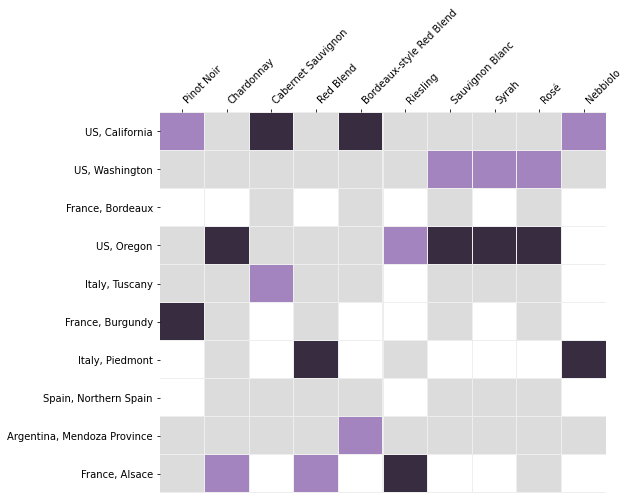

In [185]:
# pick up top regions and top wines with most review counts

df = wine

def top_n_row(r):    # Ranks the first 3 values in a series (column) replacing all others with -1
    idx = r.dropna().index
    a = [i for i in r.argsort() if i >= 0]
    max_top = (3 if len(idx) >= 3 else len(idx)) * -1
    r.loc[idx[a[max_top:]]] = np.arange(max_top*-1)
    r.loc[idx[a[:max_top]]] = -1   
    return r    # Each region & variety pair was calculated using the 90th percentile of the ratings received

def get_top_two(data, groupby, top_n):     # Pivots the top 30 wines by review count against the top N regions
    top_group = data[groupby].value_counts().head(top_n).index
    top_wine = data['variety'].value_counts().head(10).index   
    d = data[(data[groupby].isin(top_group)) & (data['variety'].isin(top_wine))]
   
    pvt = pd.pivot_table(d, index=groupby, columns='variety', values='points', 
                         aggfunc=(lambda x: np.percentile(x, 90))).loc[top_group, top_wine].apply(top_n_row, axis=0)
    return pvt

def plot_top_two(df, groupby, top_n):
    p = get_top_two(df, 'region', 10)
    rgb = [(220, 220, 220, 255), (220, 220, 220, 255), (164, 132, 191, 255), 
           (164, 132, 191, 255), (55, 44, 64, 255)]     # set the panel color
    
    for t in range(0,len(rgb)):
        rgb[t] = [c/255 for c in rgb[t]]

    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom', rgb, len(rgb))

    plt.figure(figsize=(8,7))
    ax = sns.heatmap(p, cmap=cmap, linecolor='#EEEEEE', linewidths=0.1,
                     cbar_kws={"boundaries": np.linspace(-1, 4, 4)}, cbar=False)
    ax.xaxis.tick_top()
    plt.xticks(rotation=45, ha='left')
    plt.savefig('img/wine heatmap.jpg')

df['region'] = df.apply(lambda x: '{}, {}'.
                         format(x.country if x.country is not np.nan else 'Other', x.province), axis=1)

print('For each variety, the highest region was shaded dark purple.\n' 
      'The 2nd and 3rd place regions were shaded light purple.\n' 
      'All regions not in the top 3 for that variety were left gray.\n'
      'White boxes signify no reivews for that combination.')
plot_top_two(df, 'region', 10)

## 3. Analysis of Winery with Points / Price

In [75]:
wine['winery'].value_counts()

Wines & Winemakers         244
Louis Latour               219
DFJ Vinhos                 218
Williams Selyem            216
Testarossa                 201
                          ... 
Château Le Grand Moulin      1
Airlie Bank                  1
Tefft Cellars                1
Château Cailloux de By       1
Cardinal Zin                 1
Name: winery, Length: 18556, dtype: int64

<AxesSubplot:title={'center':'Top 20 most frequent winery'}, xlabel='winery', ylabel='count'>

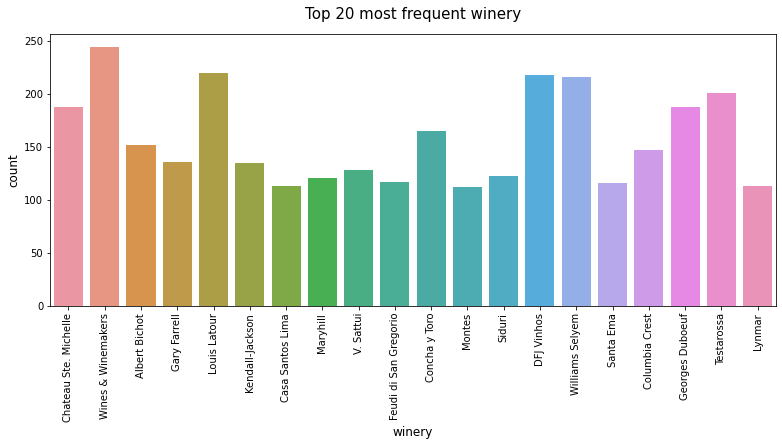

In [81]:
plt.figure(figsize=(13,5))
plt.title('Top 20 most frequent winery', size=15, pad=15)   
plt.xlabel('winery', fontsize=12) 
plt.ylabel('count', fontsize=12) 
plt.xticks(rotation=90) 
winery = wine['winery'].value_counts()[:20]  # top 20 winery features
sns.countplot(x="winery", data=wine[wine['winery'].isin(winery.index.values)])     

In [87]:
winery = wine['winery'].value_counts()[:20]
wine[wine['winery'].isin(winery.index.values)]

,points,title,description,taster_name,price,variety,province,country,winery
84,89,Chateau Ste. Michelle 2018 Riesling (Columbia ...,"Aromas of botrytis, ginger, flower and white p...",Sean P. Sullivan,9.0,Riesling,Washington,US,Chateau Ste. Michelle
112,88,Wines & Winemakers 2019 Companhia das Lezirias...,"This smooth, ripe wine has been in wood for a ...",Roger Voss,20.0,Rosé,Tejo,Portugal,Wines & Winemakers
173,90,Albert Bichot 2018 Champ La Dame (Givry),The shy nose on this wine gives little away bu...,Anne Krebiehl MW,52.0,Pinot Noir,Burgundy,France,Albert Bichot
402,91,Gary Farrell 2017 Bien Nacido Vineyard Pinot N...,"Light in the glass, this bottling is earthy in...",Matt Kettmann,70.0,Pinot Noir,California,US,Gary Farrell
614,92,Albert Bichot 2018 Les Evocelles (Gevrey-Cham...,Hints of both milk chocolate and vanilla flash...,Anne Krebiehl MW,105.0,Pinot Noir,Burgundy,France,Albert Bichot
...,...,...,...,...,...,...,...,...,...
146977,90,Columbia Crest 2011 Grand Estates Merlot (Colu...,"Generous and aromatic, this flavorful Merlot ...",Paul Gregutt,12.0,Merlot,Washington,US,Columbia Crest
146978,90,Concha y Toro 2012 Terrunyo Costa Los Boldos V...,The 2012 vintage was so hot in Chile that harv...,Michael Schachner,30.0,Sauvignon Blanc,Casablanca Valley,Chile,Concha y Toro
147039,87,Chateau Ste. Michelle 2012 Horse Heaven Vineya...,"Coming from the warm 2012 vintage, the notes v...",Sean P. Sullivan,18.0,Sauvignon Blanc,Washington,US,Chateau Ste. Michelle
147155,89,Louis Latour 2009 En Chevret (Volnay),"Soft, ripe and rich, this is very easy on the ...",Roger Voss,65.0,Pinot Noir,Burgundy,France,Louis Latour


<AxesSubplot:title={'center':'Comparison of points in different wineries'}, xlabel='winery', ylabel='points'>

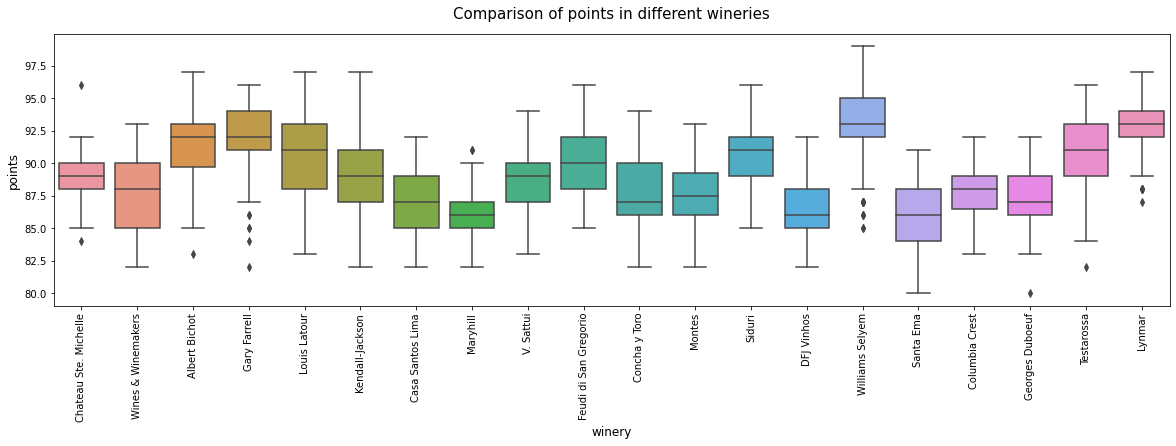

In [88]:
# winery -- points

plt.figure(figsize=(20,5))
plt.title('Comparison of points in different wineries', size=15, pad=15)   
plt.xlabel('winery', fontsize=12) 
plt.ylabel('points', fontsize=12) 
plt.xticks(rotation=90) 
sns.boxplot(x='winery', y='points', data=wine[wine['winery'].isin(winery.index.values)])

<AxesSubplot:title={'center':'Comparison of price in different wineries'}, xlabel='winery', ylabel='price'>

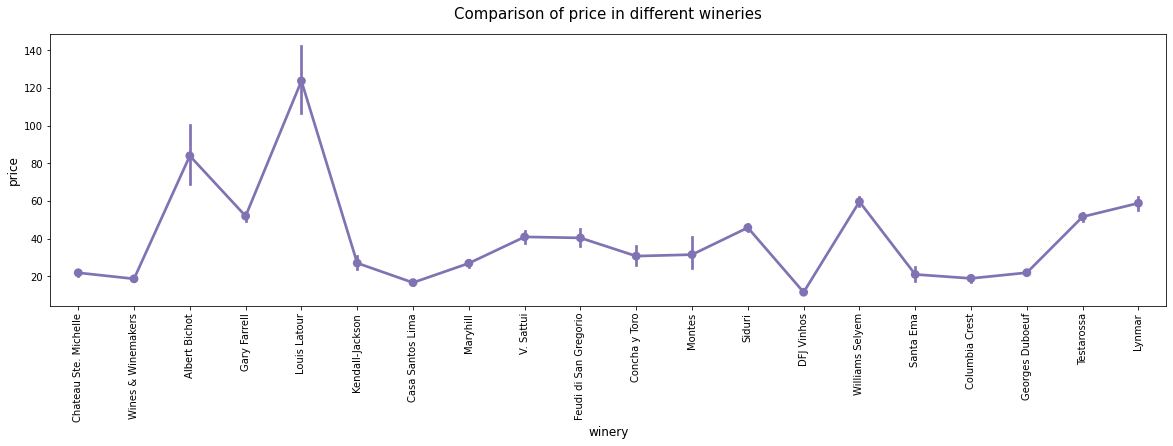

In [90]:
# winery -- price

plt.figure(figsize=(20,5))
plt.title('Comparison of price in different wineries', size=15, pad=15)  
plt.xlabel('winery', fontsize=12) 
plt.ylabel('points', fontsize=12) 
plt.xticks(rotation=90) 
sns.set_color_codes("deep")
sns.pointplot(x='winery', y='price', data=wine[wine['winery'].isin(winery.index.values)], color='m')

## 4. Analysis of Variety with Points / Price

In [91]:
wine['variety'].describe()

count         137325
unique           780
top       Pinot Noir
freq           14467
Name: variety, dtype: object

In [92]:
wine['variety'].unique()    # 780 variety types totally

array(['Red Blends', 'Vermentino', 'Rhône-style Red Blend', 'Riesling',
       'Cabernet Sauvignon', 'Carmenère', 'Bordeaux-style White Blend',
       'Bordeaux-style Red Blend', 'Merlot', 'Chardonnay', 'Mondeuse',
       'White Blend', 'Blaufränkisch', 'Petit Verdot', 'Grenache',
       'Sparkling Blend', 'Cabernet Franc', 'Sauvignon Blanc',
       'Rhône-style White Blend', 'Pinot Gris', 'Ribolla Gialla',
       'Sangiovese', 'Pinot Grigio', 'Malbec', 'Gewürztraminer',
       'Sémillon', 'Tempranillo', 'Cinsault', 'Fiano', 'Malbec-Merlot',
       'Portuguese Red', 'Pinot Noir', 'Grillo', 'Grenache Blanc',
       'Viognier', 'Cabernet Sauvignon-Petite Sirah', 'Godello',
       'Petite Sirah', 'Roussanne', 'Champagne Blend', 'Rosé', 'Tannat',
       'Aglianico', 'Shiraz', 'Grüner Veltliner', 'Touriga Franca',
       'Garganega', 'Turbiana', 'Cabernet Sauvignon-Merlot',
       'Tempranillo Blend', 'Barbera', 'Nebbiolo', 'Zinfandel',
       'Muscat Canelli', 'Verdelho', 'Syrah', 'Caberne

In [109]:
variety = wine.groupby('variety').filter(lambda x: len(x) > 1000)
variety = variety[['variety','price','points']]  
print('There are', len(variety['variety'].value_counts()), 'kinds of varieties appeared more than 1000 times.\n')     
# pick out avrieties appear more than 1000 times 

There are 29 kinds of varieties appeared more than 1000 times.



<AxesSubplot:title={'center':'Most frequent variety'}, xlabel='variety', ylabel='count'>

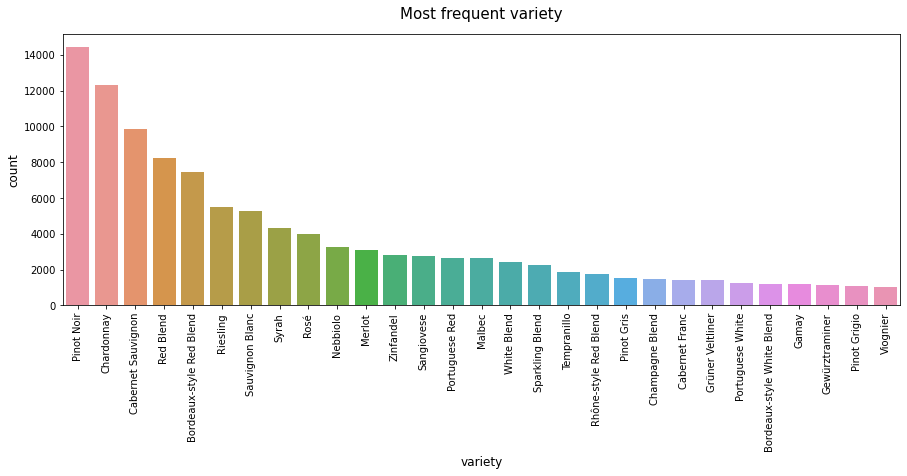

In [108]:
plt.figure(figsize=(15,5))
plt.title('Most frequent variety', size=15, pad=15)   
plt.xlabel('variety', fontsize=12) 
plt.ylabel('count', fontsize=12) 
plt.xticks(rotation=90) 
variety_top24 = variety['variety'].value_counts().index.tolist()
sns.countplot(x="variety", data=variety, order=variety_top24)   

<AxesSubplot:title={'center':'Price of top 24 varieties'}, xlabel='variety', ylabel='price'>

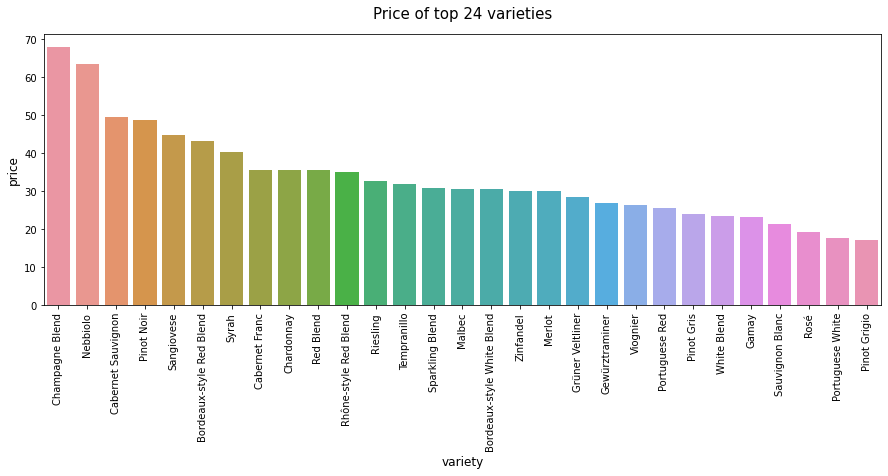

In [118]:
# variety -- price (top 24)

variety_price = variety.groupby(['variety']).mean()['price'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,5))
plt.title('Price of top 24 varieties', size=15, pad=15)   
plt.xlabel('variety', fontsize=12) 
plt.ylabel('price', fontsize=12) 
plt.xticks(rotation=90) 
sns.barplot(x=variety_price.index, y='price', data=variety_price)

<AxesSubplot:title={'center':'The grapes used for the cheap wines'}, xlabel='price', ylabel='variety'>

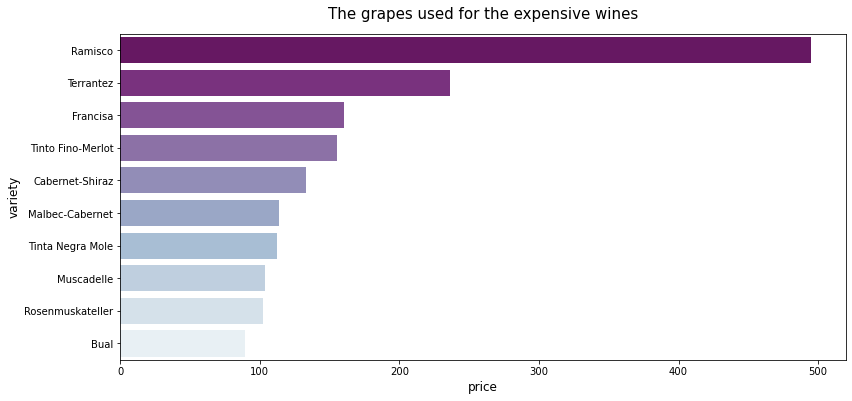

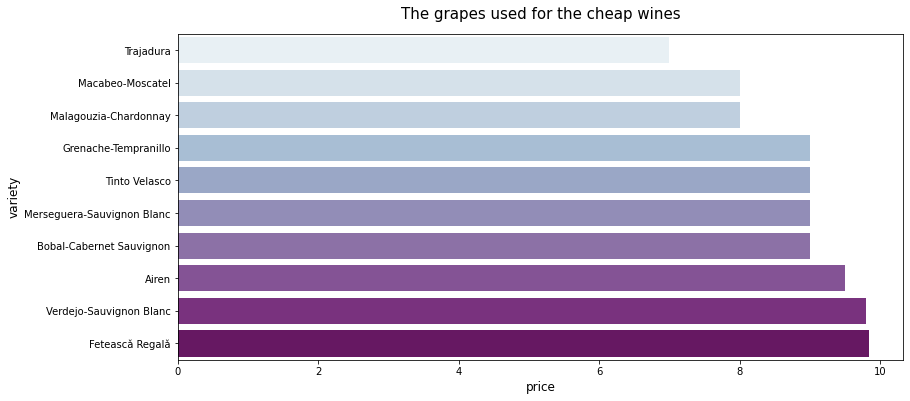

In [122]:
# variety -- price (top 10 most expensive)

most_expensice = wine.groupby(['variety']).mean()['price'].sort_values(ascending=False).to_frame()[:10]
plt.figure(figsize=(13,6))
plt.title('The grapes used for the expensive wines', size=15, pad=15)   
plt.xlabel('price', fontsize=12) 
plt.ylabel('variety', fontsize=12) 
sns.barplot(y=most_expensice.index, x='price', data=most_expensice, palette= 'BuPu_r')

# variety -- price (top 10 cheapest)

cheapest = wine.groupby(['variety']).mean()['price'].sort_values(ascending=True).to_frame()[:10]
plt.figure(figsize=(13,6))
plt.title('The grapes used for the cheap wines', size=15, pad=15)   
plt.xlabel('price', fontsize=12) 
plt.ylabel('variety', fontsize=12) 
sns.barplot(y=cheapest.index, x='price', data=cheapest, palette= 'BuPu')

<AxesSubplot:title={'center':'Points of top 24 varieties'}, xlabel='variety', ylabel='points'>

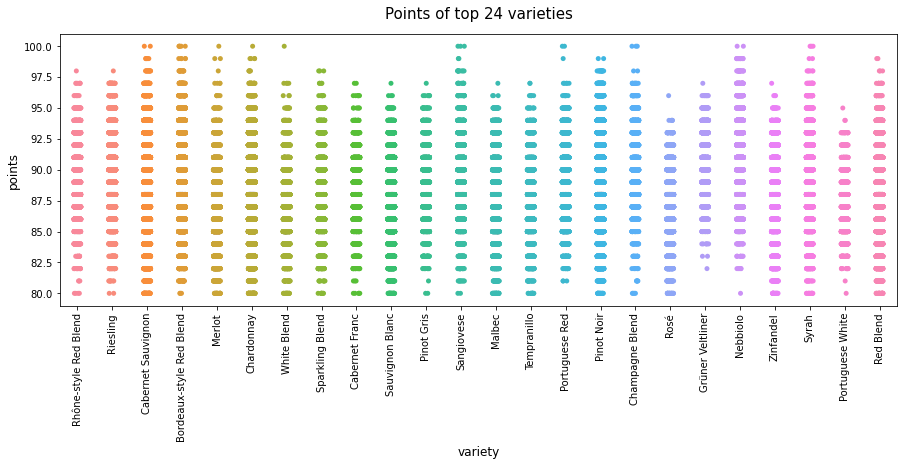

In [119]:
# variety -- points (top 24)

variety_points = wine['variety'].value_counts()[:24]
plt.figure(figsize=(15,5))
plt.title('Points of top 24 varieties', size=15, pad=15)   
plt.xlabel('variety', fontsize=12) 
plt.ylabel('points', fontsize=12) 
plt.xticks(rotation=90) 
sns.stripplot(x='variety', y='points', data=wine[wine['variety'].isin(variety_points.index.values)])

<AxesSubplot:title={'center':'The grapes uesd for low-rated wines'}, xlabel='points', ylabel='variety'>

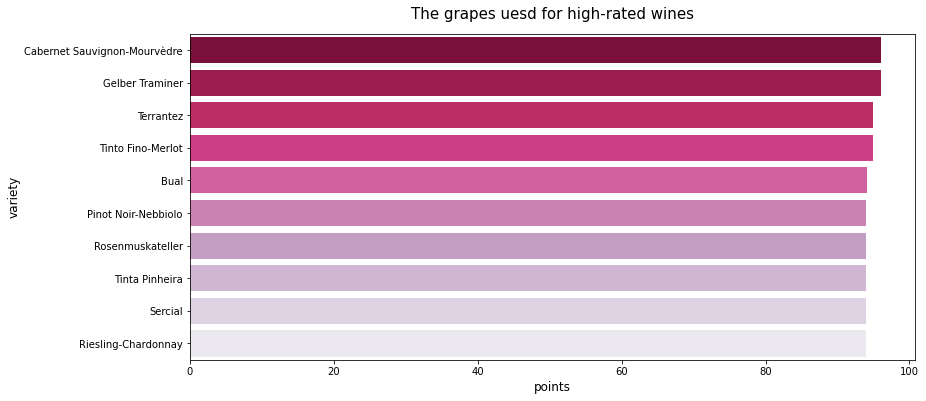

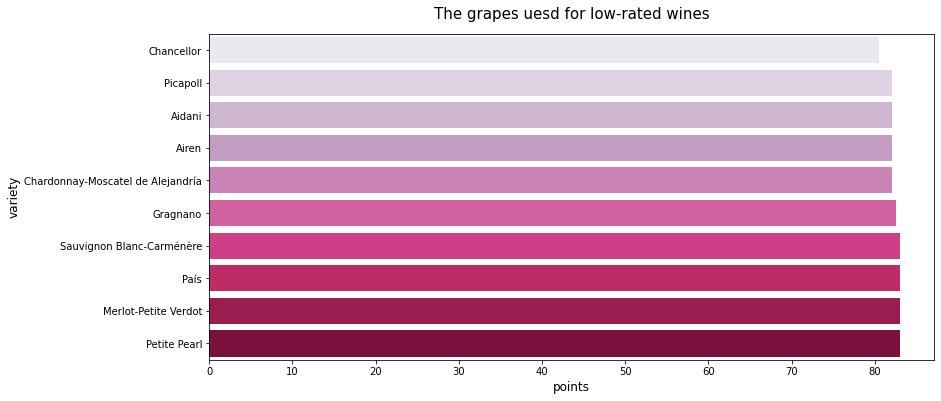

In [121]:
# variety -- points (top 10 highest)

highest = wine.groupby(['variety']).mean()['points'].sort_values(ascending=False).to_frame()[:10]
plt.figure(figsize=(13,6))
plt.title('The grapes uesd for high-rated wines', size=15, pad=15)   
plt.xlabel('points', fontsize=12) 
plt.ylabel('variety', fontsize=12) 
sns.barplot(y=highest.index, x='points', data=highest, palette= 'PuRd_r')

# variety -- points (top 10 lowest)

lowest = wine.groupby(['variety']).mean()['points'].sort_values(ascending=True).to_frame()[:10]
plt.figure(figsize=(13,6))
plt.title('The grapes uesd for low-rated wines', size=15, pad=15)   
plt.xlabel('points', fontsize=12) 
plt.ylabel('variety', fontsize=12) 
sns.barplot(y=lowest.index, x='points', data=lowest, palette= 'PuRd')

In [123]:
# variety -- high points and low price

highest_point = wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:10]
cheap = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:10]

pd.merge(highest_point, cheap, how='inner', on=['variety'])  # The four varieties with high points and low price

,points,price
variety,,
Syrah,100,4.0
White Blend,100,4.0
Portuguese Red,100,5.0
Merlot,100,4.0


## 5. Analysis of Taster

<AxesSubplot:title={'center':'Taster name count'}, xlabel='taster_name', ylabel='count'>

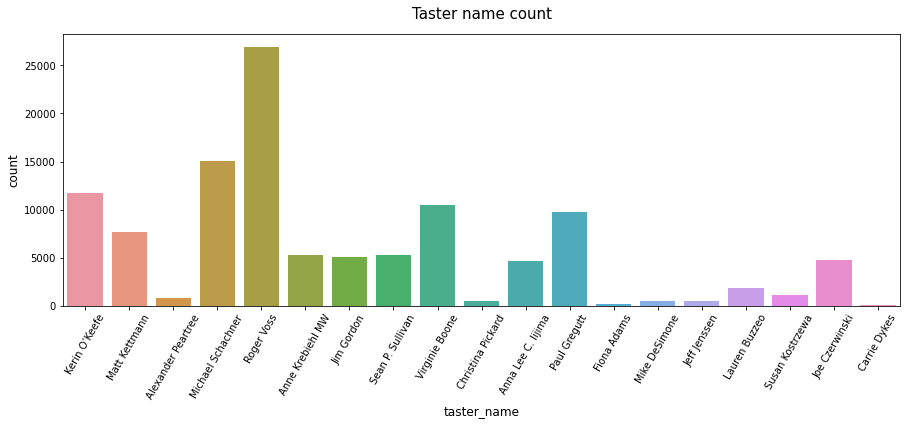

In [124]:
plt.figure(figsize=(15,5))
plt.title('Taster name count', size=15, pad=15)   
plt.xlabel('taster name', fontsize=12) 
plt.ylabel('count', fontsize=12) 
plt.xticks(rotation=60) 
sns.countplot(x="taster_name", data=wine)   

In [125]:
# taster -- points

wine.groupby("taster_name")["points"].describe()

,count,mean,std,min,25%,50%,75%,max
taster_name,,,,,,,,
Alexander Peartree,822.0,86.869830,2.385776,80.0,85.0,87.0,88.0,95.0
Anna Lee C. Iijima,4693.0,88.803963,2.767398,80.0,87.0,89.0,91.0,98.0
Anne Krebiehl MW,5318.0,90.986085,2.455968,80.0,89.0,91.0,93.0,99.0
Carrie Dykes,129.0,86.356589,2.026382,81.0,85.0,87.0,88.0,92.0
Christina Pickard,543.0,90.145488,3.127519,82.0,88.0,90.0,93.0,98.0
Fiona Adams,201.0,86.134328,2.739866,80.0,84.0,86.0,88.0,91.0
Jeff Jenssen,483.0,88.293996,2.182661,82.0,87.0,89.0,89.5,100.0
Jim Gordon,5034.0,88.735201,2.810458,80.0,87.0,89.0,91.0,100.0
Joe Czerwinski,4766.0,88.524339,2.903436,80.0,87.0,89.0,91.0,100.0


<AxesSubplot:title={'center':'Taster name points distribuition'}, xlabel='points', ylabel='taster_name'>

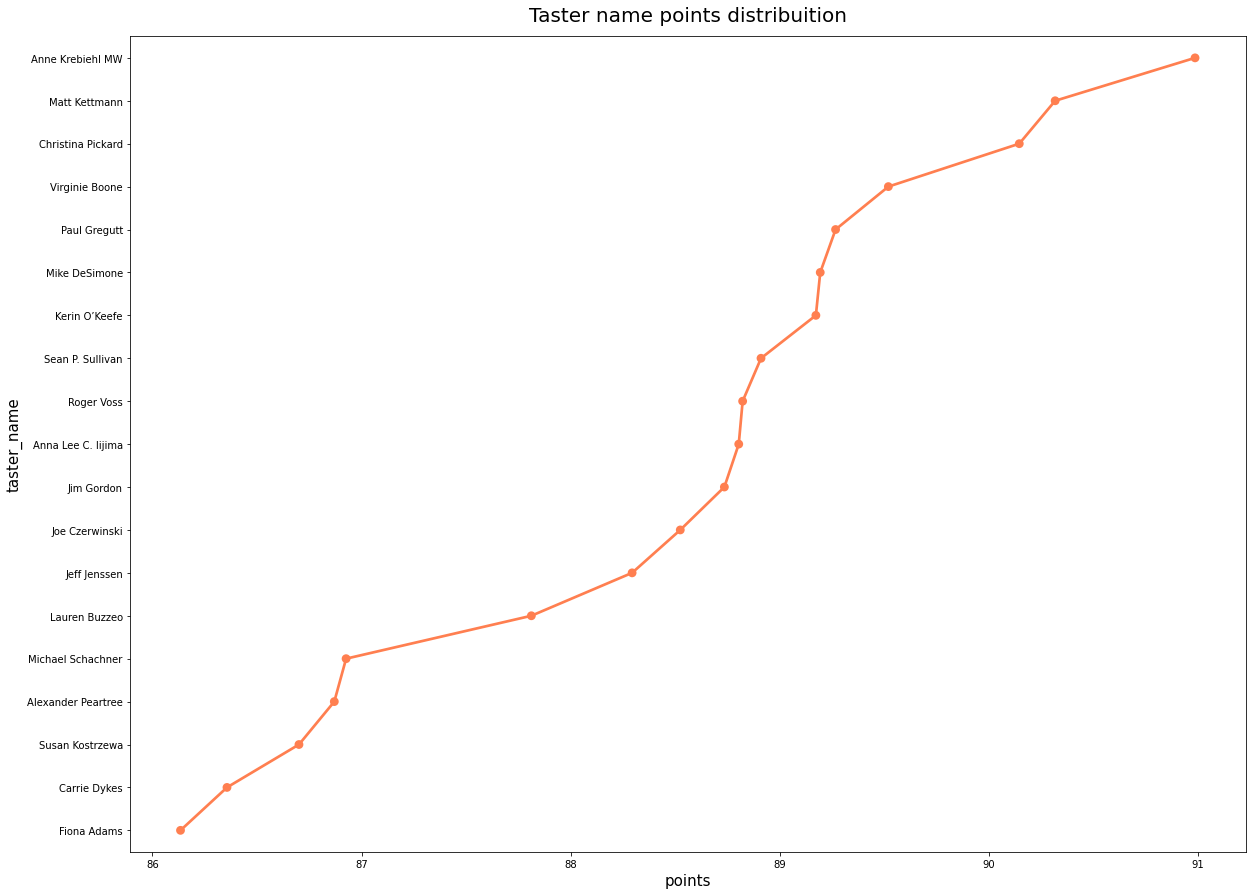

In [126]:
taster_points = wine.groupby(['taster_name']).mean()['points'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(20,15))
plt.title('Taster name points distribuition', size=20, pad=15)   
plt.xlabel('average of points', fontsize=15) 
plt.ylabel('taster name', fontsize=15) 
sns.pointplot(x='points', y=taster_points.index, data=taster_points, color='coral', markers='o')

<AxesSubplot:title={'center':'Taster name points distribuition'}, xlabel='taster_name', ylabel='points'>

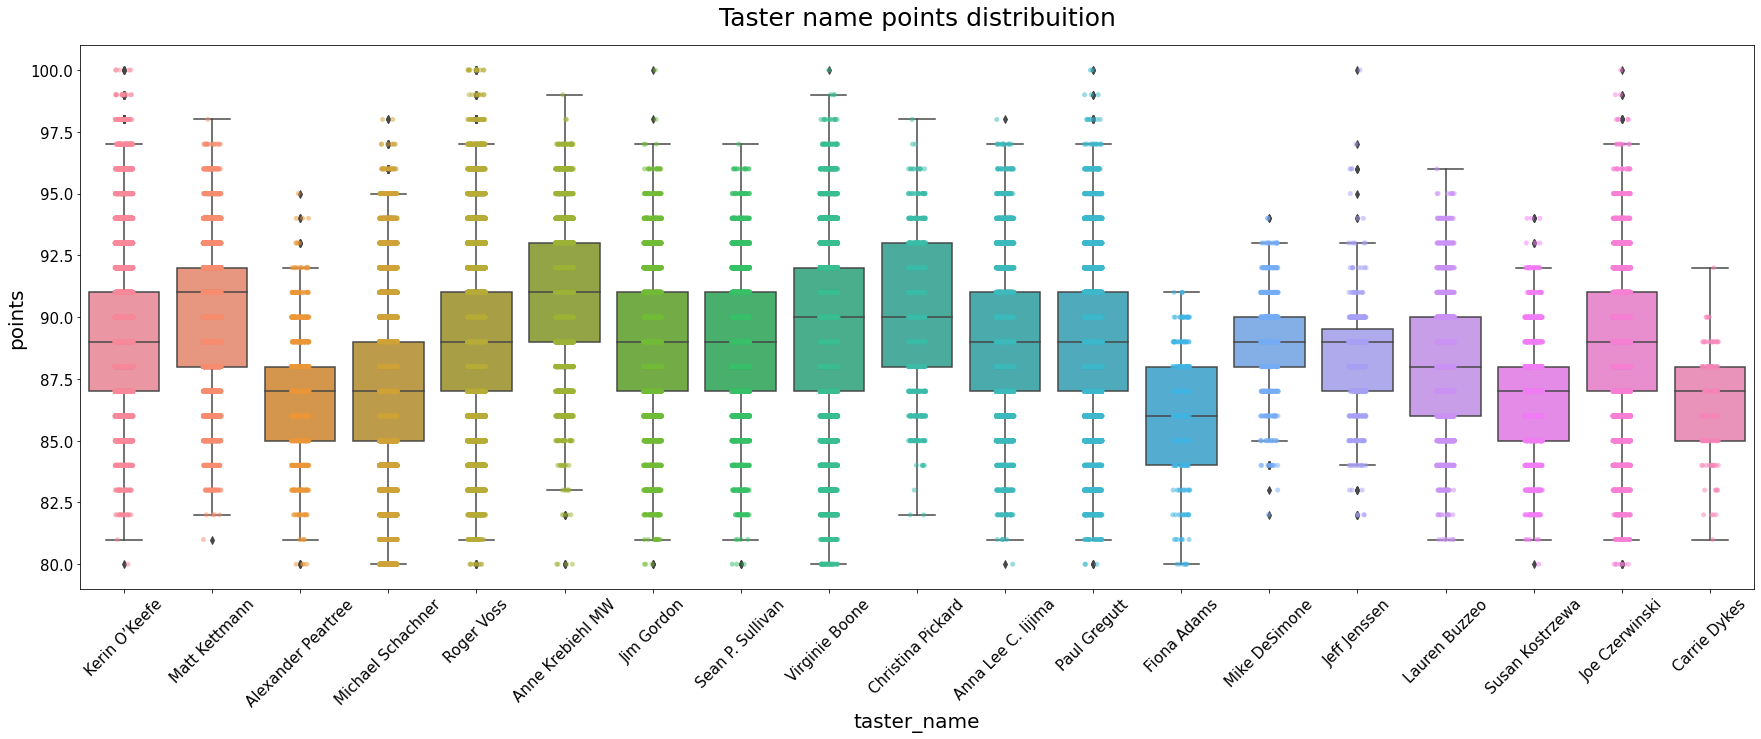

In [127]:
plt.figure(figsize = (30,10))
plt.title('Taster name points distribuition', size=25, pad=20)   
plt.ylabel('average of points', fontsize=20) 
plt.xlabel('taster name', fontsize=20) 
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
sns.boxplot(y='points', x='taster_name', data=wine)
sns.stripplot(y='points', x='taster_name', data=wine, marker='o', alpha=0.5) 

In [128]:
# taster -- price

wine.groupby("taster_name")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
taster_name,,,,,,,,
Alexander Peartree,822.0,25.501217,14.613973,9.0,17.25,22.0,30.0,250.0
Anna Lee C. Iijima,4693.0,31.150650,41.197393,4.0,16.00,23.0,33.0,775.0
Anne Krebiehl MW,5318.0,38.537232,41.461535,10.0,21.00,27.0,45.0,1100.0
Carrie Dykes,129.0,30.418605,10.824378,14.0,24.00,28.0,35.0,75.0
Christina Pickard,543.0,39.337017,58.403061,7.0,19.00,26.0,40.0,850.0
Fiona Adams,201.0,23.208955,13.522800,10.0,14.00,19.0,28.0,85.0
Jeff Jenssen,483.0,22.186335,22.581307,6.0,11.00,16.0,25.0,320.0
Jim Gordon,5034.0,27.973977,33.202764,4.0,15.00,24.0,35.0,2018.0
Joe Czerwinski,4766.0,35.245279,45.091681,5.0,16.00,22.0,39.0,850.0


<AxesSubplot:title={'center':'Taster name price distribuition'}, xlabel='price', ylabel='taster_name'>

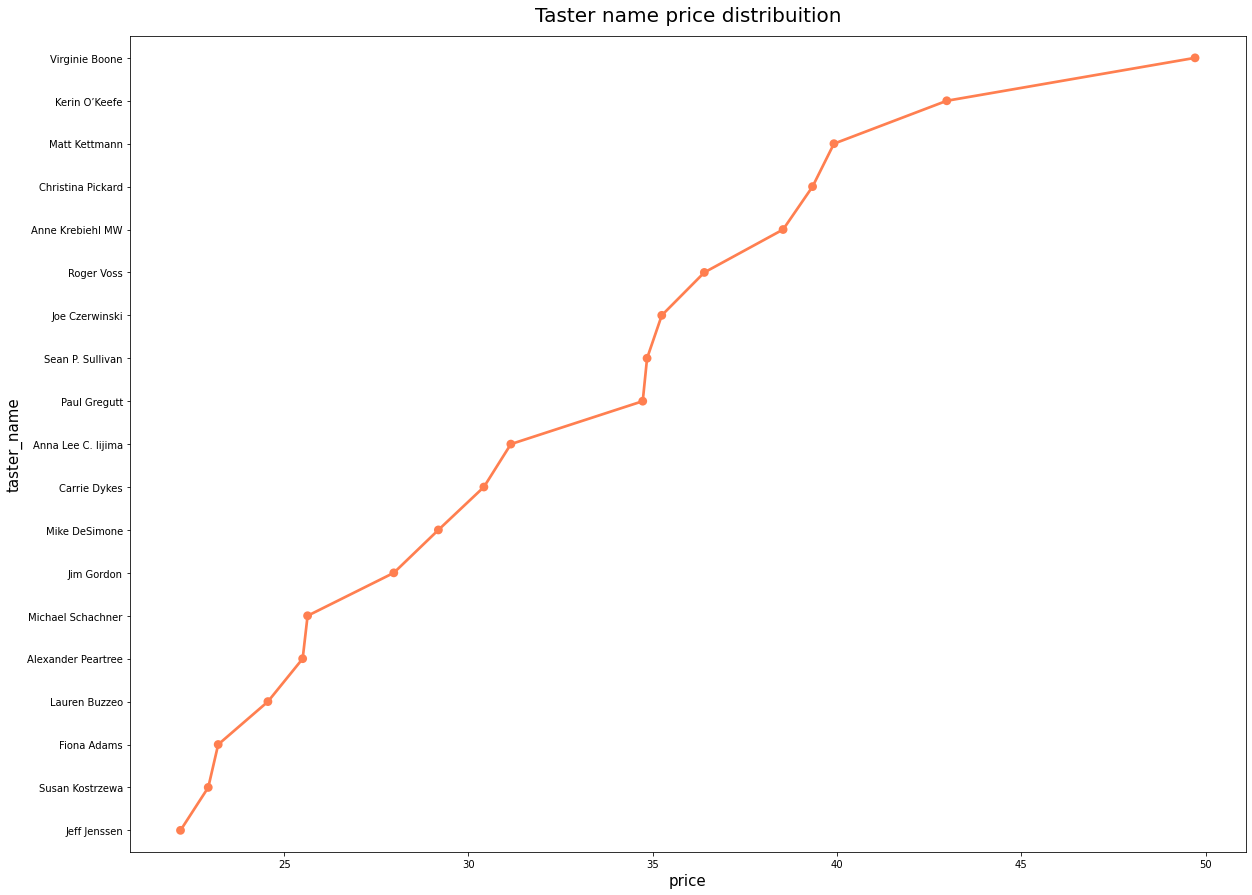

In [129]:
taster_price = wine.groupby(['taster_name']).mean()['price'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(20,15))
plt.title('Taster name price distribuition', size=20, pad=15)   
plt.xlabel('average of price', fontsize=15) 
plt.ylabel('taster name', fontsize=15) 
sns.pointplot(x='price', y=taster_price.index, data=taster_price, color='coral', markers='o')

<AxesSubplot:title={'center':'Taster name price distribuition'}, xlabel='taster_name', ylabel='price'>

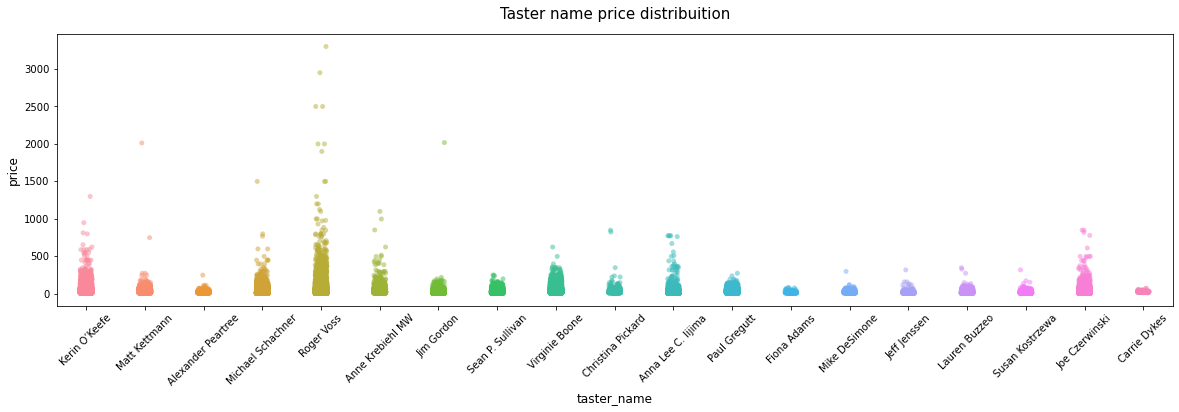

In [130]:
plt.figure(figsize = (20,5))
plt.title('Taster name price distribuition', size=15, pad=15)   
plt.ylabel('average of price', fontsize=12) 
plt.xlabel('taster name', fontsize=12) 
plt.xticks(fontsize=10, rotation=45) 
plt.yticks(fontsize=10) 
sns.stripplot(y='price', x='taster_name', data=wine, marker='o', alpha=0.5)

## 6. Analysis of Description

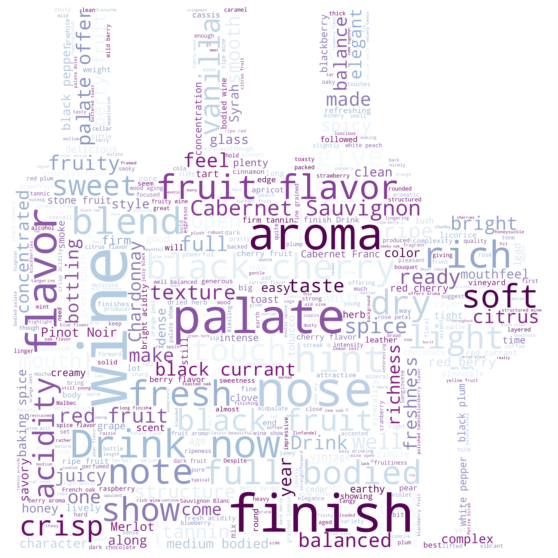

In [162]:
# the wordcloud of description

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import imageio   # read the local picture as a word cloud shape picture

mk = imageio.imread("img/wine glass.png")
plt.figure(figsize=(20,10))
w = WordCloud(max_words=500, max_font_size=400, background_color='white', stopwords = STOPWORDS, 
              colormap='BuPu', mask=mk)
w.generate(' '.join(wine['description']))
plt.imshow(w, interpolation="bilinear")
plt.axis('off')
plt.show()

w.to_file('img/wordcloud 1.png')   # export wordcloud picture to 'img' folder

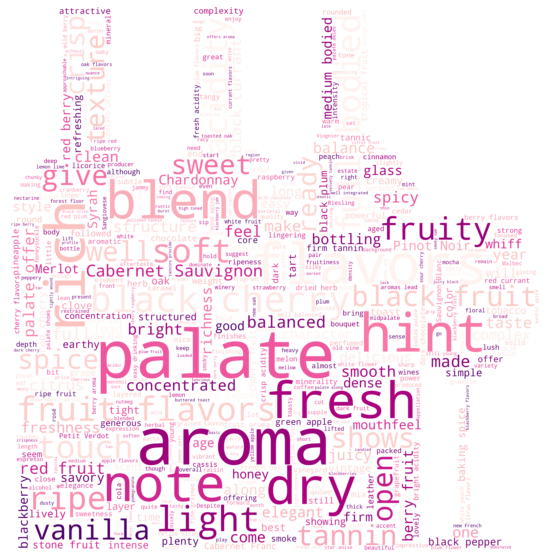

In [165]:
# delete some frequent but meaningless words.

stopwords = set(STOPWORDS)
newStopWords = ['Drink','wine','drink','finish','nose','show','now','mouth','flavor']    # delete these words
stopwords.update(newStopWords)   

mk = imageio.imread("img/wine glass.png")
plt.figure(figsize=(20,10))
w = WordCloud(max_words=500, max_font_size=400, background_color='white', stopwords = stopwords, 
              colormap='RdPu', mask=mk)
w.generate(' '.join(wine['description']))
plt.imshow(w, interpolation="bilinear")
plt.axis('off')
plt.show()

w.to_file('img/wordcloud 2.png')

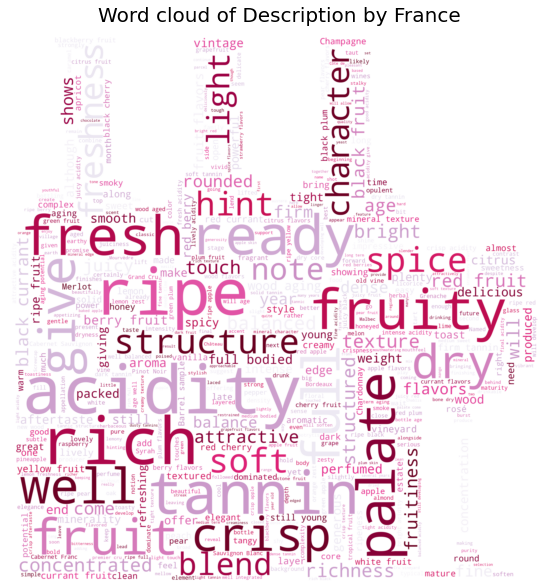

In [166]:
# take descriptions about wines from France

mk = imageio.imread("img/wine glass.png")
plt.figure(figsize=(20,10))
plt.title('Word cloud of Description by France', size=20, pad=15)
w = WordCloud(max_words=500, max_font_size=400, background_color='white', stopwords = stopwords, 
              colormap='PuRd', mask=mk)
w.generate(' '.join(wine[wine['country'] =='France']['description']))
plt.imshow(w, interpolation="bilinear")
plt.axis('off')
plt.show()

w.to_file('img/wordcloud 3.png')

In [187]:
# classifying wines by description

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('[a-z]+')         # all words composed of lowercase letters
stops = set(stop_words.ENGLISH_STOP_WORDS)    # get stop_words
wines = set([w for v in wine['variety'].unique() for w in tokenizer.tokenize(v.lower())])   # get all variety names
stopwords = stops | wines  # get the sum of 'stop_words' and 'wine types names' as the final stopwords (type = set) 

tfidf_m = TfidfVectorizer(tokenizer=tokenize, binary=True, min_df=0.01, max_df=0.95, stop_words=stopwords).fit(wine['description'])
# TfidfVectorizer set min_df and max_df to achieve feature selection by words frequency
# It's not important whether a word is used once or many times, so the vectorizer uses binary calculations.

tfidf_d = tfidf_m.transform(wine['description'])    # set TFIDF vectorization on wine descriptions to create wine clusters
    
df = pd.DataFrame(tfidf_d.toarray()).set_index(wine['variety'])      # set index by wine['variety']
df.columns = tfidf_m.get_feature_names()    # array mapping from feature integer indices to feature name
    
top_wines = wine['variety'].value_counts().head(60).index     # 60 wines type names

tf_wines = df.loc[top_wines].groupby(level=0).mean()    # groupby(level=0): the first column of the first level label

/Users/arisa/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


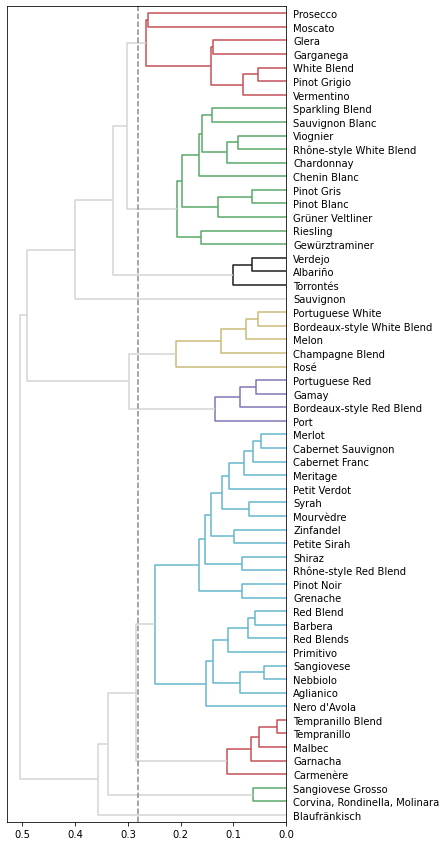

In [190]:
# hierarchical clustering by description

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

plt.figure(figsize=(5,15)) 
l = linkage(tf_wines, method='average', metric='cosine')    
r = dendrogram(l, color_threshold=.280, labels=tf_wines.index.values, orientation='left', leaf_font_size=10, 
               above_threshold_color='#d4d4d4')   # set threshold = 0.280, which cut the data into logical groupings
 
plt.axvline(.280, color='#8a8a8a', linestyle='--')

clusts = fcluster(l, t=.280, criterion='distance')
plt.savefig('wine dendogram.jpg', bbox_inches='tight')  # makes the plot smaller than declared figsize

In [191]:
# describe the clusters

df = tf_wines.copy()

if clusts is not None:           
    df['cluster'] = clusts
    df = df.set_index('cluster', append=True).groupby(level=1).mean()
        
for number, grp in df.groupby(level=0):
    order = np.argsort(-grp.values)[0][:10]    # first 10 topwords to describe this cluster
        
    if clusts is not None:
        print('\n***Cluster - {}***'.format(number))
        df_wines = tf_wines.index.values[clusts==number]
        max_sel = len(df_wines) if len(df_wines) <5 else 5   # chocie 5 tipical varities
        df_wines = np.random.choice(df_wines, max_sel, replace=False)
        print('Varities: ' + ', '.join([c for c in df_wines]))
    else:
        print('\n***Variety - {}***'.format(number))

    print('Top Words: ' + ', '.join([c for c in grp.columns[order]]))


***Cluster - 1***
Varities: Sangiovese Grosso, Corvina, Rondinella, Molinara
Top Words: spice, cherry, wine, aromas, fruit, bright, leather, tobacco, cola, tones

***Cluster - 2***
Varities: Garnacha, Carmenère, Malbec, Tempranillo, Tempranillo Blend
Top Words: aromas, finish, flavors, berry, plum, palate, herbal, feels, oak, fruit

***Cluster - 3***
Varities: Nero d'Avola, Rhône-style Red Blend, Cabernet Franc, Meritage, Red Blend
Top Words: cherry, tannins, aromas, flavors, wine, palate, fruit, blackberry, spice, finish

***Cluster - 4***
Varities: Blaufränkisch
Top Words: fruit, palate, freshness, cherry, nose, tannins, blueberry, juicy, ripe, fresh

***Cluster - 5***
Varities: Bordeaux-style Red Blend, Port, Portuguese Red, Gamay
Top Words: wine, tannins, fruits, drink, acidity, ripe, rich, fruit, structure, aging

***Cluster - 6***
Varities: Portuguese White, Rosé, Champagne Blend, Melon, Bordeaux-style White Blend
Top Words: wine, drink, crisp, acidity, ripe, fruity, texture, re